# Images in Python (Pillow)


## A. J. Zerouali (21/07/26)

These notes correspond to Section 16 of Pierian Data's Python Bootcamp (Lectures 125-128). The core of the material is in Lecture 126, and focuses on properties of the Images class in the Pillow library.


## Importing PIL.Images and opening images

The first import we'll need is the following:

In [1]:
from PIL import Image

This gives access to the Image class. To open a file, one uses ***image_var*.open(*file_path_name*)**:

In [2]:
img_kids = Image.open('IMG-20190414-WA0148.jpg')
img_kids.show()

In Jupyter, calling the image variable will display the contained image in the notebook. In the command line, one uses ***image_var*.show()** to display the image, in which case it will be opened by the default OS program to display images.

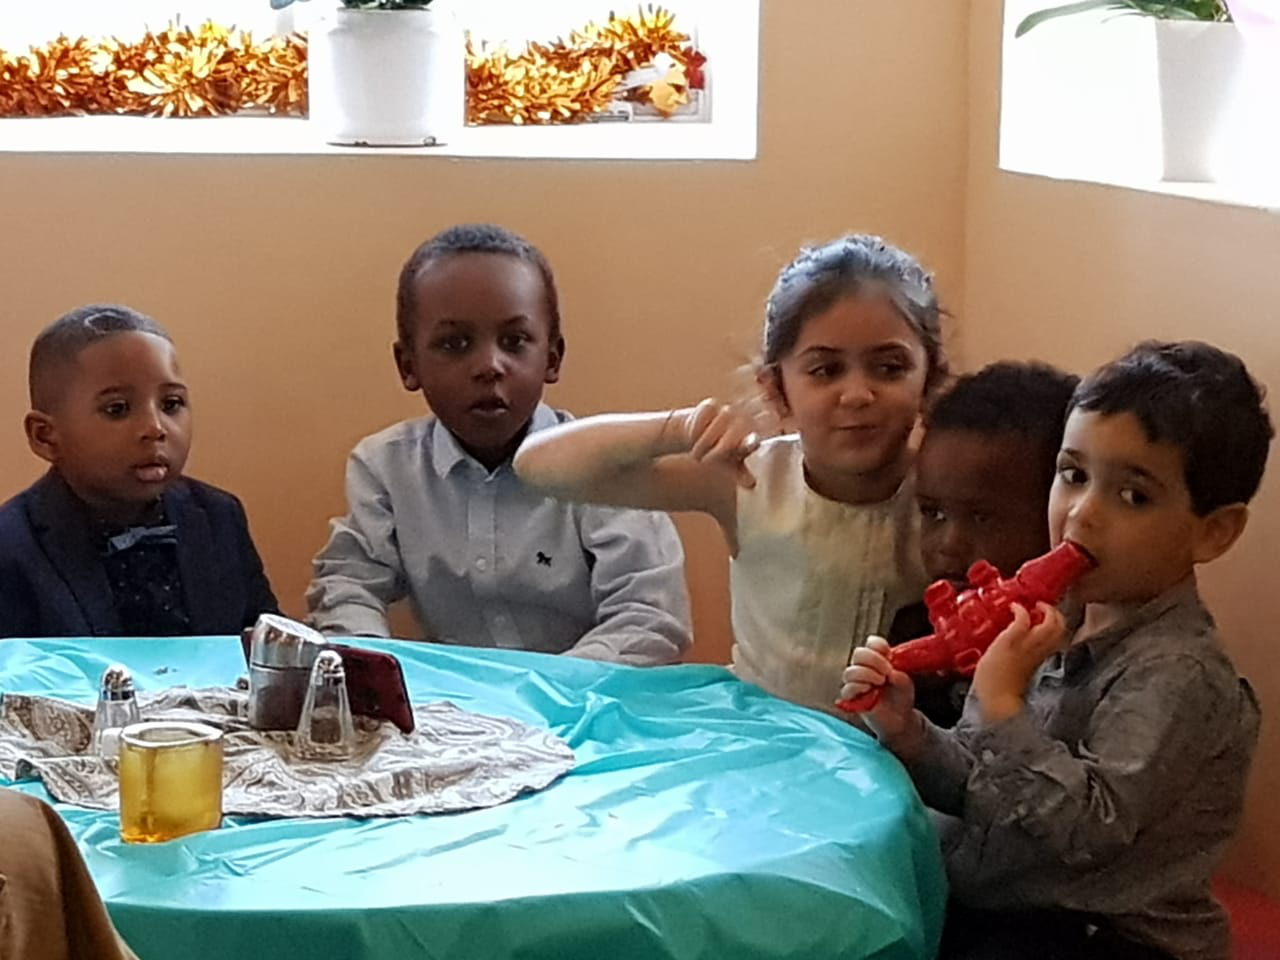

In [3]:
img_kids

## Cropping images

One of the fundamental attributes of an image is its size in terms of pixels. This is simply obtained using ***image_var*.size**:

In [8]:
img_kids.size

(1280, 960)

Cropping with the PIL.Image class is done using the **.crop(*(x_i, y_i, x_i+w, y_i+w)*)** method, where the argument tuple is given by:

* The coordinates ***(x_i, y_i)*** of the *top left* corner of the rectangle to be cropped to. In Pillow, the origin (0, 0) of the image is the top left corner.

* If ***(w, h)*** denote the width (along x-axis) and the height (along y-axis) of the rectangle we want to crop to, the last 2 coordinates in .crop() are the *bottom right* coordinates of said rectangle.

Here are examples:

In [3]:
img_noe = img_kids.crop((0, 290, 225, 290+225))

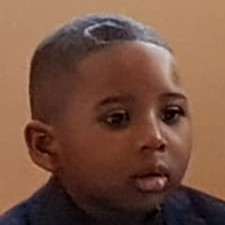

In [47]:
img_noe

In [4]:
img_rachel = img_kids.crop((730, 240, 730+ 245, 240+ 260))

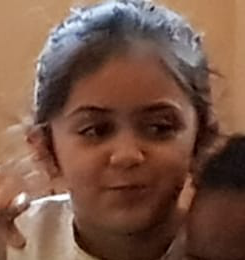

In [48]:
img_rachel

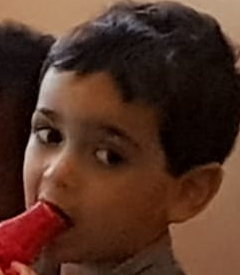

In [5]:
img_ethan = img_kids.crop((1025, 340,1025+240, 340+275))
img_ethan

## Basic operations

Here we discuss pasting, resizing and rotating. These are performed via the **.paste()**, **.resize()** and **.rotate()** methods of PIL.Image respectively.

* **Pasting:** 

The signature of the method is: ***img_var*.paste(im = *pasted_img*, box = *(x,y)*, mask= *mask_img*)**. Here we paste *im* *into* img_var at the coordinates specified in *box*. The mask variable is for "mixing" images, and we'll give an example below.

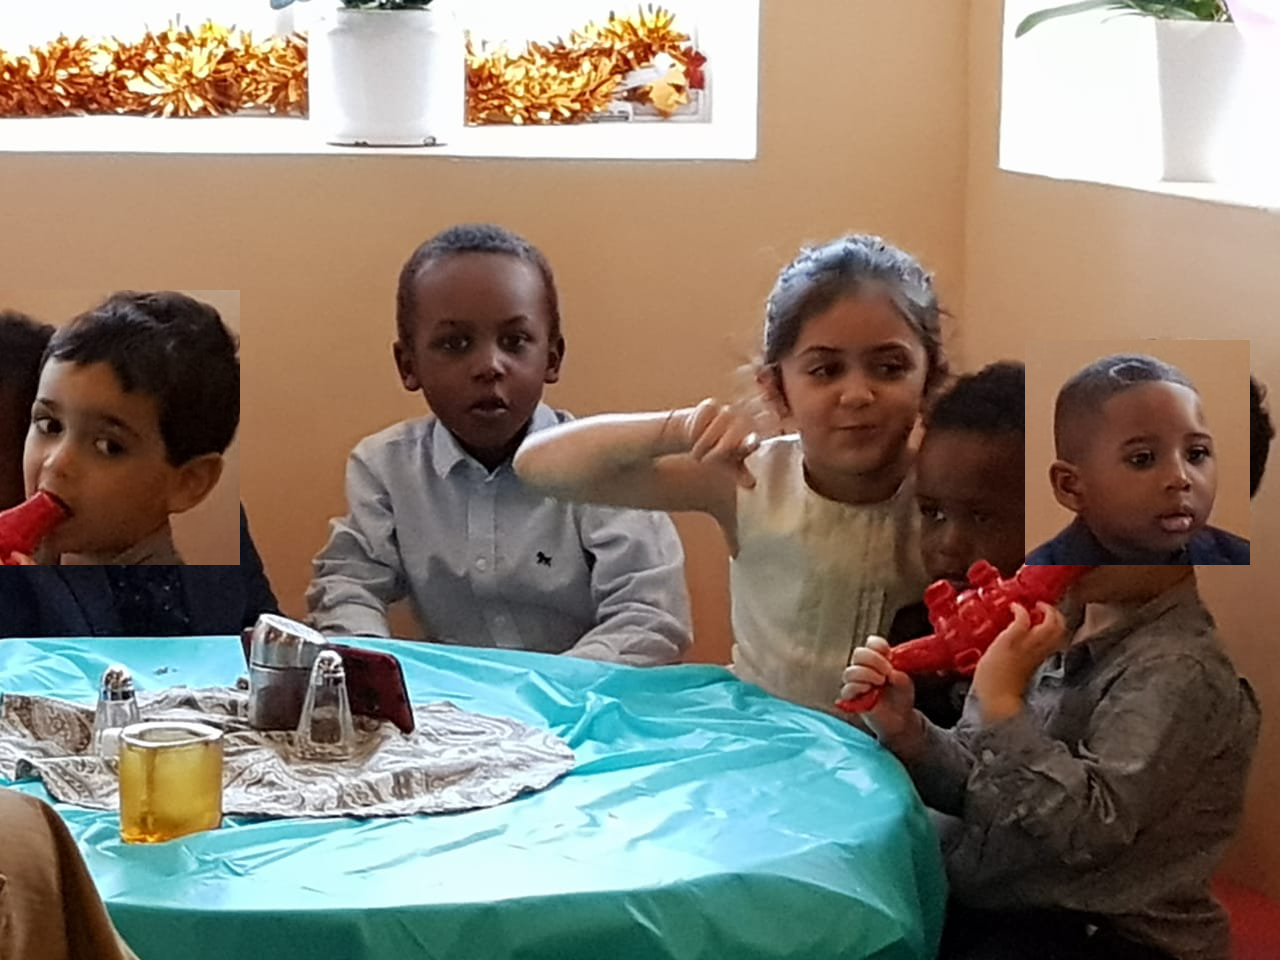

In [65]:
img_pro_photoshop = Image.open("IMG-20190414-WA0148.jpg")
# Ethan's top left corner is (1025,340)
# Noe's top left corner is (0,290)
# Let's exchange their heads
img_pro_photoshop.paste(im = img_ethan, box = (0,290))
img_pro_photoshop.paste(im = img_noe, box = (1025,340))

img_pro_photoshop

* **Resizing**

The signature is ***img_var*.resize(*(new_w, new_h)*)**, where *(new_w, new_h)* is the new size in pixels. Here's an example: 

In [6]:
img_photoshop_big_heads  = Image.open('IMG-20190414-WA0148.jpg')
# Ethan's top left corner is (1025,340), dimension is (225,225)
# Noe's top left corner is (0,290), dimension is (245,260)
# Let's exchange their heads
img_photoshop_big_heads.paste(im = img_ethan.resize((350,450)), box = (0,65))
img_photoshop_big_heads.paste(im = img_noe.resize((450,450)), box = (820,150))

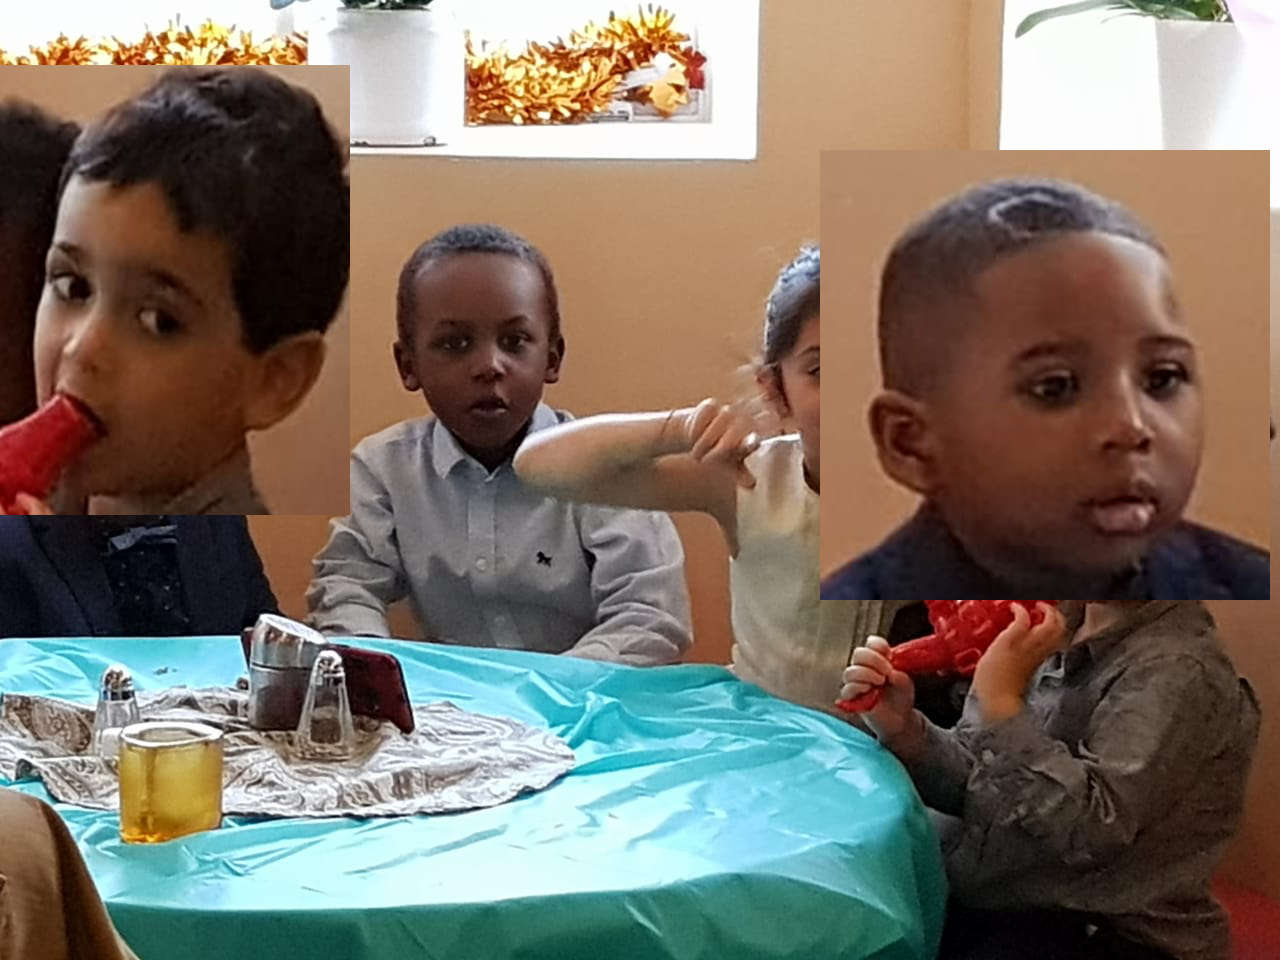

In [7]:
img_photoshop_big_heads

* **Rotating**

The ***img_var*.rotate(*angle_float*)** method will rotate the image by *angle_float* counter-clockwise:

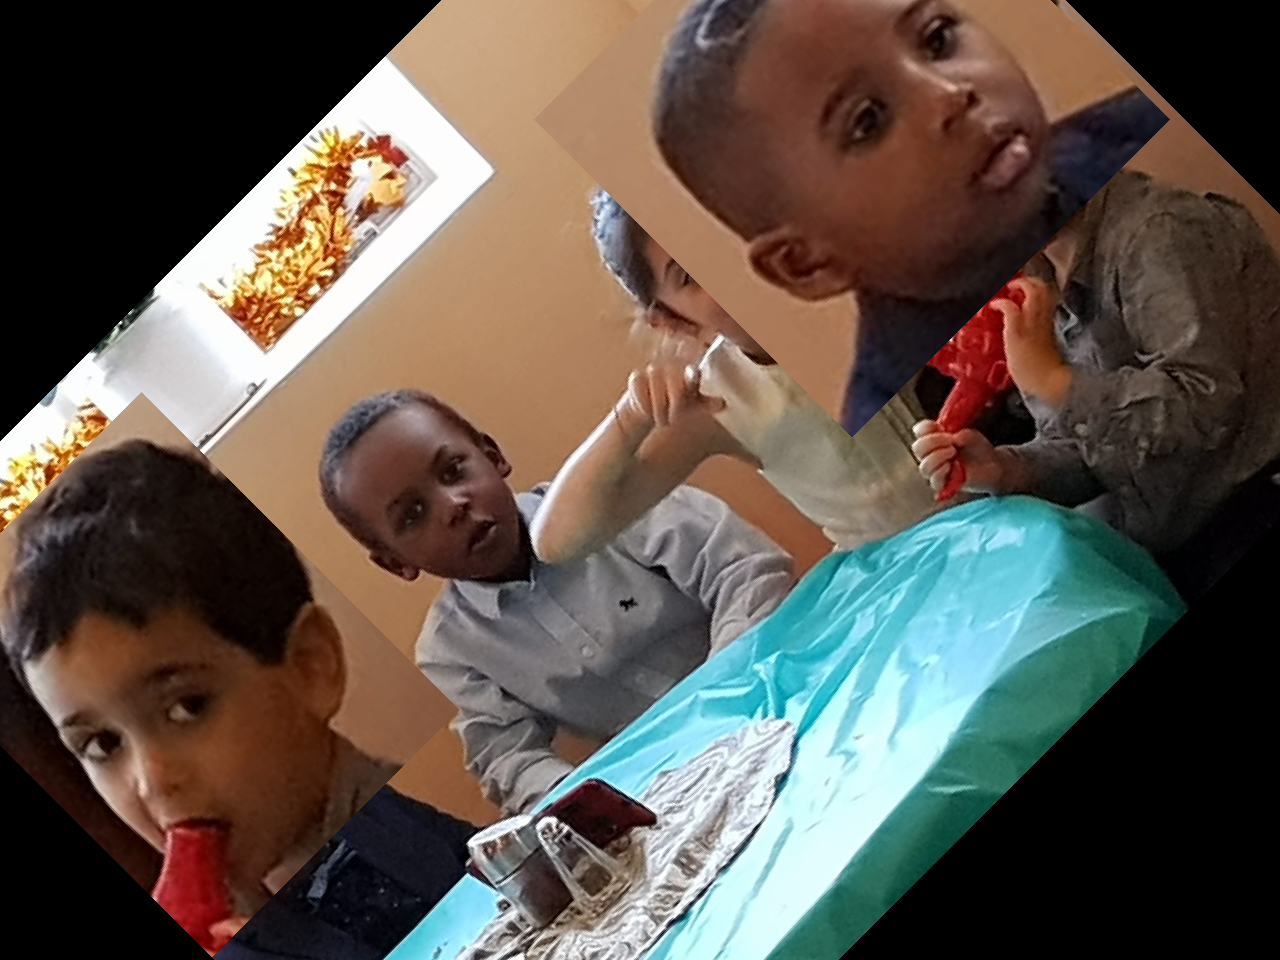

In [72]:
img_photoshop_big_heads.rotate(45)

* **Saving**

Saving uses ***img_var*.save(*file_path_name.ext*)**. Pillow accounts for the chosen file format in the filename.

In [9]:
img_photoshop_big_heads.save('big_heads.png')

<img src ='big_heads.png' width =640 height = 480 />

## Transparency and masks

One of the additional methods discussed by Portilla in Lecture 126 is the ***imag_var*.putalpha(*opacity*)** method, where *opacity* is an integer between 0 and 255. Here's an example:

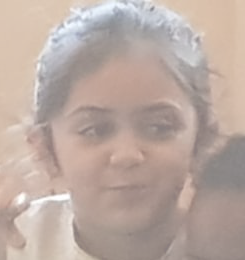

In [11]:
img_rachel.putalpha(128)
img_rachel

This allows to superpose an image upon another as a mask. The exercise for this section of the course gives a perfect example of this procedure:

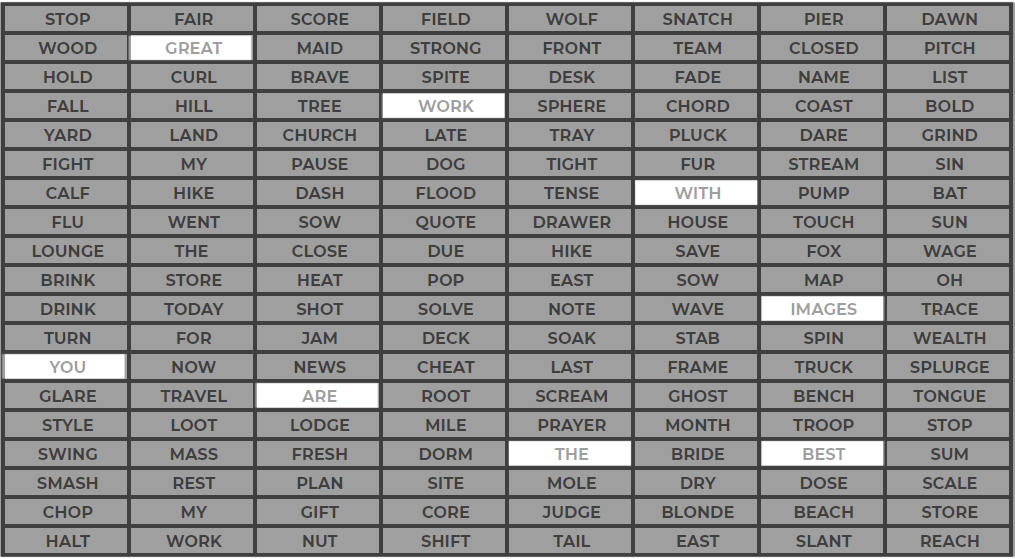

In [31]:
# Load mask and word matrix
img_words = Image.open('word_matrix.png')
img_mask = Image.open('mask.png')

# Change mask opacity to 128
img_mask.putalpha(128)

# Add mask to word matrix and display the hidden message
a,b= img_words.size
img_words.paste(im = img_mask.resize((a,b)), box = (0,0), mask =img_mask.resize((a,b)) )
img_words
